### Created By :- Faldu jay
#### Email :- jay.faldu928@gmail.com

# Summer Analytics 2020 Capstone Project
## Predicting Employee Attrition in the Dawn of Recession

        
       As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

### Aim of The Competition
    To predict Employee Attrition by the given data about his/her past history.

In [161]:
# importing required librery

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

### importing data

In [162]:
data = pd.read_csv("train.csv")
data_y = data.Attrition
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


### Data description

#### Education

 1) 'Below College'
 2) 'College'
 3) 'Bachelor'
 4) 'Master'
 5) 'Doctor'

#### EnvironmentSatisfaction

 1 'Low'
 2 'Medium'
 3 'High'
 4 'Very High'

#### JobInvolvement

 1 'Low'
 2 'Medium'
 3 'High'
 4 'Very High'

#### JobSatisfaction

 1 'Low'
 2 'Medium'
 3 'High'
 4 'Very High'
 
#### PerformanceRating

 1 'Low'
 2 'Good'
 3 'Excellent'
 4 'Outstanding'

#### Behaviour

 1 'Good'
 2 'Bad'
 3 'Not Rated'

#### CommunicationSkill

 1 'Bad'
 2 'Average'
 3 'Good'
 4 'Better'
 5 'Best'
 
#### StockOptionLevel

 0 'No stocks'
 1 'Less Stocks'
 2 'Moderate Stocks'
 3 'A lot of Stocks'

## Exploratory Data Analysis

### Attrition of employee in different department

In [163]:
df_Department = data.groupby('Attrition').Department.value_counts().unstack(0)
df_Department

Attrition,0,1
Department,,
Human Resources,36,45
Research & Development,564,415
Sales,243,325


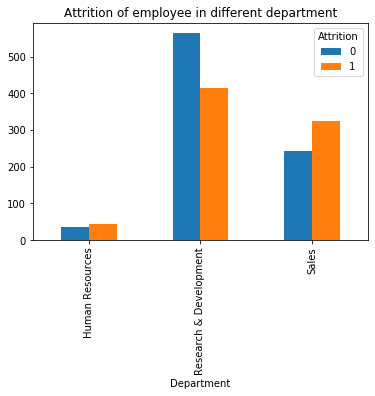

In [164]:
df_Department.plot.bar(title='Attrition of employee in different department')

#  



### Attrition of male and female

In [165]:
df_gender = data.groupby('Gender').Attrition.value_counts().unstack(0)
df_gender

Gender,Female,Male
Attrition,,
0,337,506
1,295,490


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002739A61CC08>,
      dtype=object)

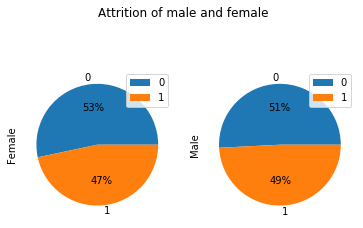

In [166]:
df_gender.plot.pie(subplots=True,autopct='%1.0f%%',title='Attrition of male and female')

#  



### Attrition of employee according to education field

In [167]:
df_educationfield = data.groupby('Attrition').EducationField.value_counts().unstack(0)
df_educationfield

Attrition,0,1
EducationField,,
Human Resources,15,25
Life Sciences,348,275
Marketing,82,115
Medical,286,235
Other,50,35
Technical Degree,62,100


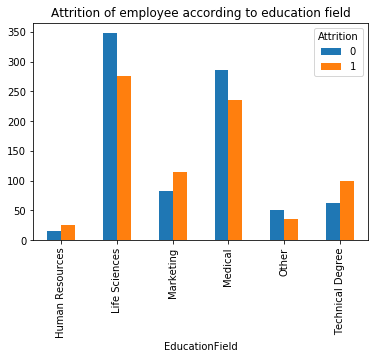

In [169]:
df_educationfield.plot.bar(title='Attrition of employee according to education field')

#  



### Attrition of employee according to degree

In [102]:
df_degree = data.groupby('Attrition').Education.value_counts().unstack(0)
df_degree

Attrition,0,1
Education,,
1,101,100
2,151,155
3,329,315
4,234,200
5,28,15


([<matplotlib.axis.XTick at 0x2739a134348>,
 <a list of 5 Text xticklabel objects>)

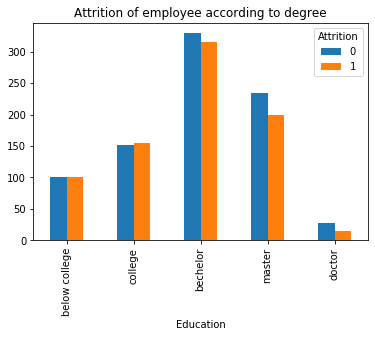

In [103]:
df_degree.plot.bar(title='Attrition of employee according to degree')
plt.xticks([0,1,2,3,4],['below college','college','bechelor','master','doctor'])

#  



### Attrition of employee according to it's StockOptionLevel

In [104]:
df_StockOptionLevel = data.groupby('Attrition').StockOptionLevel.value_counts().unstack(0)
df_StockOptionLevel

Attrition,0,1
StockOptionLevel,,
0,326,510
1,377,180
2,90,45
3,50,50


([<matplotlib.axis.XTick at 0x2739a164108>,
 <a list of 4 Text xticklabel objects>)

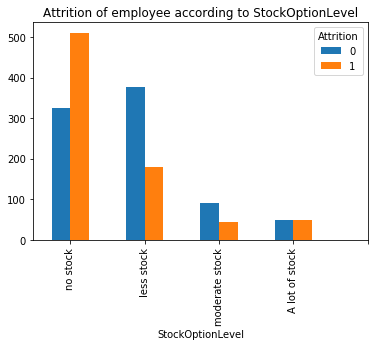

In [105]:
df_StockOptionLevel.plot.bar(title='Attrition of employee according to StockOptionLevel')
plt.xticks([0,1,2,3,4],['no stock','less stock','moderate stock','A lot of stock'])

#  



### Attrition of employee according to it's JobRole

In [106]:
df_JobRole = data.groupby('Attrition').JobRole.value_counts().unstack(0)
df_JobRole

Attrition,0,1
JobRole,,
Healthcare Representative,85.0,25.0
Human Resources,27.0,45.0
Laboratory Technician,130.0,180.0
Manager,70.0,20.0
Manufacturing Director,91.0,30.0
Research Director,47.0,NaN
Research Scientist,176.0,165.0
Sales Executive,180.0,185.0
Sales Representative,37.0,135.0


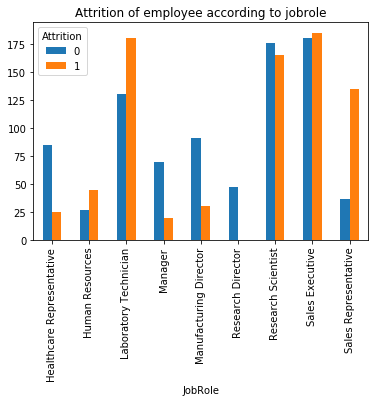

In [107]:
df_JobRole.plot.bar(title='Attrition of employee according to jobrole')

#  



## Data Preparation

In [170]:
# import librery for lable encoding

from sklearn.preprocessing import LabelEncoder

In [171]:
le_busnesstravel = LabelEncoder()
le_Department = LabelEncoder()
le_EducationField = LabelEncoder()
le_Gender = LabelEncoder()
le_JobRole = LabelEncoder()
le_MaritalStatus = LabelEncoder()
le_OverTime = LabelEncoder()

data['busnesstravel_n'] = le_busnesstravel.fit_transform(data['BusinessTravel'])
data['Department_n'] = le_busnesstravel.fit_transform(data['Department'])
data['EducationField_n'] = le_busnesstravel.fit_transform(data['EducationField'])
data['Gender_n'] = le_busnesstravel.fit_transform(data['Gender'])
data['JobRole_n'] = le_busnesstravel.fit_transform(data['JobRole'])
data['MaritalStatus_n'] = le_busnesstravel.fit_transform(data['MaritalStatus'])
data['OverTime_n'] = le_busnesstravel.fit_transform(data['OverTime'])

data = data.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis='columns')

In [172]:
data.head()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,busnesstravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,1,30,0,2,3,571,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,1,0,1,3,0,2,2,0
1,2,36,0,12,4,1614,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,1,2,1,1,0,4,1,1
2,3,55,1,2,1,842,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,1,2,2,3,1,7,2,0
3,4,39,0,24,1,2014,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,1,2,1,1,1,6,2,0
4,5,37,0,3,3,689,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,1,2,1,4,1,4,1,0


#### now we rempve column which has no meaning in prediction. for example Id and employee number etc....

In [173]:
data = data.drop(['Id','Attrition','EmployeeNumber','Behaviour'],axis='columns')

# we remove attrition column because it is target and we store it in data_y dataframe

In [174]:
data.dtypes

Age                        int64
DistanceFromHome           int64
Education                  int64
EnvironmentSatisfaction    int64
JobInvolvement             int64
JobSatisfaction            int64
MonthlyIncome              int64
NumCompaniesWorked         int64
PercentSalaryHike          int64
PerformanceRating          int64
StockOptionLevel           int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
CommunicationSkill         int64
busnesstravel_n            int32
Department_n               int32
EducationField_n           int32
Gender_n                   int32
JobRole_n                  int32
MaritalStatus_n            int32
OverTime_n                 int32
dtype: object

#  




## Create Mechine Learning Model

    we have classiffication problem to solve. we need to classify employee in Attrition (1,0) based on given feature.
     
    there are some machine learning model which we can use for example logistic regression classifier, SVM classifier, decission tree,random forest.
     
    decission tree and random forest are doing good for categorical data. in our data mostly all feature are catagorical. so we use any one from those two. random forest work better then decission tree and it has less verience so we used random forest for this classification.

#### split data in trainning and testing set

In [175]:
# train test split

from sklearn.model_selection import train_test_split as tts

In [176]:
x_train,x_test,y_train,y_test = tts(data,data_y,test_size=0.33,random_state=4)

In [177]:
x_train.shape

(1090, 25)

In [178]:
x_test.shape

(538, 25)

#  



#### Creat Random Forest model from sklearn librery

In [179]:
from sklearn.ensemble import RandomForestClassifier as RFS

In [180]:
model = RFS(random_state=24,n_estimators=500,max_depth=50)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

In [181]:
model.score(data,data_y)

0.9932432432432432

In [182]:
y_predict = model.predict(x_test)

In [183]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_predict)

0.980565371024735

#### our model perform good!!!!!!!!!

#### it has accuracy of 99.32% in training set and 98.05% in testing set